# Environments Settings

In [ ]:
def set_seed_for_gpu(seed=42):
    import os, random, numpy as np, tensorflow as tf
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.threading.set_intra_op_parallelism_threads(1)
    tf.config.threading.set_inter_op_parallelism_threads(1)

set_seed_for_gpu()

# CT 3D Concepts

#### View

In [ ]:
from dimentions_exploration_3D_2D import ThreeDExploration

dimension_exp  = ThreeDExploration()

# dimension_exp.plot_voxel_planes_highlighted_v2(volume_shape=(17, 13, 11), voxel_coords=(8, 6, 5))
dimension_exp.plot_voxel_planes_highlighted_interactive(volume_shape=(17, 13, 11))

import cv2
img_path = 'medical_images/slices_kind.png'
img_path_2 = 'medical_images/Human_anatomy_planes.jpg'



#### Matrix

In [ ]:
from dimentions_exploration_3D_2D import ThreeDExploration

dimension_exp  = ThreeDExploration()

volume = dimension_exp.create_ct_volume(shape=(3, 3, 3))  # Feel free to change dimensions

print(volume)


In [ ]:
dimension_exp.view_slice(volume, 'sagittal', 0)
dimension_exp.view_slice(volume, 'coronal', 0)
dimension_exp.view_slice(volume, 'axial', 0)

In [ ]:
from ct_visualizer import CTVisualizer
from ct_image_processing import ImageProcessing

root = 'ct_images/' #'/Users/yigal/CT-Datasets/'

liver_images_path = f"{root}Task03_Liver/imagesTr/"
liver_labels_path = f"{root}Task03_Liver/labelsTr/"


In [ ]:

image_name = "liver_10.nii.gz"

imgProcessor = ImageProcessing()
ctVisualizer = CTVisualizer()

ct_image, ct_image_info = imgProcessor.loadCTImage(f"{liver_images_path}{image_name}")
ct_labels,  ct_labels_info = imgProcessor.loadCTLabel(f"{liver_labels_path}{image_name}")

slice_num = -1 # middle

imgProcessor.print_ct_info(ct_image_info)
ctVisualizer.display_ct_data(ct_image, slice_num=slice_num)

imgProcessor.print_ct_info(ct_labels_info)
ctVisualizer.display_ct_data(ct_labels, slice_num=slice_num)


In [21]:
import importlib
import sys

# Reload the module
module_path = 'ct_image_processing'

if module_path in sys.modules:
    importlib.reload(sys.modules[module_path])
else:
    import ImageProcessing
    importlib.reload(ImageProcessing)

# Re-import the class
from ct_image_processing import ImageProcessing

(512, 512, 841)
CT Image Name: liver_4.nii.gz
CT Image Info: {'total_slices': 841, 'total_labeled_slices': 250, 'Plane': 'Transverse (Axial) [:, :, i]', 'Shape': (512, 512)}
Processing Info: {'target_size': (256, 256), 'hu_window': (30, 180)}


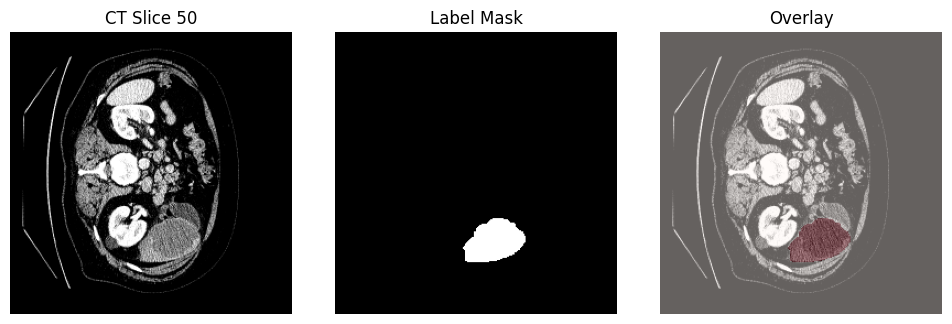

In [23]:
image_name = "liver_4.nii.gz"

imgProcessor = ImageProcessing()
ctVisualizer = CTVisualizer()

plane_kind = ['Sagittal', 'Coronal', 'Axial']
ct_slices, label_slices, info = imgProcessor.load_image_and_labels_slices(f"{liver_images_path}{image_name}",
                                                                f"{liver_labels_path}{image_name}",
                                                                          plane=plane_kind[2],
                                                                          only_labeled_slices=True)

processing_options = {
    'target_size': (256, 256),
    'hu_window': (30, 180),
}

resized_ct_slices, resized_label_slices = imgProcessor.resize_all_slices(ct_slices, label_slices,
                                                                         binary=True,
                                                                         target_size=processing_options['target_size'],
                                                                         hu_window=processing_options['hu_window'])

print ('CT Image Name:', image_name)

print('CT Image Info:', info)

print('Processing Info:', processing_options)

slice_index = 50

ctVisualizer.display_single_slice(resized_ct_slices, resized_label_slices, slice_index=slice_index)


# Dataset Preparation

In [24]:

number_of_ct_patients = 12


#### Load Datasets | Training | Global Test

In [ ]:
from ct_image_processing import ImageProcessing
import numpy as np

imgProcessor = ImageProcessing()

# Load Dataset

X_all, Y_all, patient_ids = imgProcessor.load_dataset(f"datasets/liver_dataset_{number_of_ct_patients}.npz")

print(len(X_all), len(Y_all), len(patient_ids))

total_slices = sum(x.shape[0] for x in X_all)
print(f"Total 2D slices: {total_slices}")

# X_all = np.concatenate(X_all_list, axis=0)
# Y_all = np.concatenate(Y_all_list, axis=0)

In [27]:
from ct_image_processing import ImageProcessing
import numpy as np

imgProcessor = ImageProcessing()

num_test_patients = 10

# Load Dataset

X_global_test_list, Y_global_test_list, patient_ids_test = imgProcessor.load_dataset(f"datasets/test_liver_dataset_{num_test_patients}.npz")

print(len(X_global_test_list), len(Y_global_test_list), len(patient_ids_test))

total_slices = sum(x.shape[0] for x in X_global_test_list)
print(f"Total 2D slices: {total_slices}")

X_global_test = np.concatenate(X_global_test_list, axis=0)
Y_global_test = np.concatenate(Y_global_test_list, axis=0)


10 10 10
Total 2D slices: 1720


### Create Dataset | Training | Global Test

In [25]:
from ct_image_processing import ImageProcessing
from ct_visualizer import CTVisualizer

root = 'ct_images/' #'/Users/yigal/CT-Datasets/'

liver_images_path = f"{root}Task03_Liver/imagesTr/"
liver_labels_path = f"{root}Task03_Liver/labelsTr/"

liver_images_test_path = f"{root}Task03_Liver/imagesTs/"
liver_labels_test_path = f"{root}Task03_Liver/labelsTs/"

imgProcessor = ImageProcessing()

ctVisualizer = CTVisualizer()

X_all = []
Y_all = []


#### global tests (dataset)

In [ ]:
import numpy as np

num_test_patients = 10

X_global_test_list, Y_global_test_list, patient_ids_test, total_test = imgProcessor.create_dataset(liver_images_test_path,
                                                        liver_labels_test_path,
                                                        binary=True,
                                                        target_size=(256, 256),
                                                        hu_window=(30, 180),
                                                        number_of_ct_patients=num_test_patients,
                                                        labeled_only=True,
                                                        patient_offset=121)

print(total_test)

total_slices = sum(x.shape[0] for x in X_global_test_list)
print(f"Total 2D slices: {total_slices}")

X_global_test = np.concatenate(X_global_test_list, axis=0)
Y_global_test = np.concatenate(Y_global_test_list, axis=0)

print(X_global_test.shape, Y_global_test.shape)



In [ ]:
if (len(X_global_test_list) > 0 and len(Y_global_test_list) > 0):
    imgProcessor.save_dataset(X_global_test_list, Y_global_test_list, patient_ids_test, f"datasets/test_liver_dataset_{num_test_patients}.npz")
else:
    print('X_all || Y_all are empty')

In [ ]:
# Show Samples
number_of_samples = 2
number_of_slices = 2
for i in range(number_of_samples):
    print(f"Sample {i}: liver_{i}.nii.gz")
    ctVisualizer.display_XY_samples_v2(X_global_test[i], Y_global_test[i], max_slices=number_of_slices)

In [ ]:
import matplotlib.pyplot as plt

# Choose patient index and slice index
patient_idx = 0
slice_idx = 15  # or any valid index for that patient

# Extract the slice (shape: 256x256x1)
slice_img = X_global_test[patient_idx][slice_idx]

# Remove channel dim if needed (256x256x1 → 256x256)
if slice_img.ndim == 3 and slice_img.shape[-1] == 1:
    slice_img = slice_img.squeeze(-1)

# Plot it
plt.imshow(slice_img, cmap='gray')
plt.title(f"Patient {patient_idx}, Slice {slice_idx}")
plt.axis('off')
plt.show()

#### Training Set (datasset)

In [26]:

# Create Dataset
print(f"Start Building CT Dataset with {number_of_ct_patients} patients")

X_all, Y_all, patient_ids, total = imgProcessor.create_dataset(liver_images_path,
                                                        liver_labels_path,
                                                        binary=True,
                                                        target_size=(256, 256),
                                                        hu_window=(30, 180),
                                                        number_of_ct_patients=number_of_ct_patients,
                                                        labeled_only=True)

print(total)
print('Len (X, Y, Patients):', len(X_all), len(Y_all), len(patient_ids))
print(f'Sample Patient Shapes ({patient_ids[2]}): X[2] Y[2]:', X_all[2].shape, Y_all[2].shape)

# for 130 patients: {'total_labeled_slices': 18922, 'total_slices': 58014}


Start Building CT Dataset with 12 patients
(512, 512, 75)
liver_0 slices: 29 / 75
(512, 512, 123)
liver_1 slices: 29 / 123
(512, 512, 517)
liver_2 slices: 139 / 517
(512, 512, 534)
liver_3 slices: 169 / 534
(512, 512, 841)
liver_4 slices: 250 / 841
(512, 512, 537)
liver_5 slices: 176 / 537
(512, 512, 518)
liver_6 slices: 186 / 518
(512, 512, 541)
liver_7 slices: 177 / 541
(512, 512, 541)
liver_8 slices: 179 / 541
(512, 512, 549)
liver_9 slices: 173 / 549
(512, 512, 501)
liver_10 slices: 181 / 501
(512, 512, 466)
liver_11 slices: 167 / 466
{'total_labeled_slices': 1855, 'total_slices': 5743}
Len (X, Y, Patients): 12 12 12
Sample Patient Shapes (liver_2): X[2] Y[2]: (139, 256, 256, 1) (139, 256, 256, 1)


In [ ]:
# Save Dataset

if (len(X_all) > 0 and len(Y_all) > 0):
    imgProcessor.save_dataset(X_all, Y_all, patient_ids, f"datasets/liver_dataset_{number_of_ct_patients}.npz")
else:
    print('X_all || Y_all are empty')

In [ ]:

# Show Samples
number_of_samples = 1
number_of_slices = 2
for i in range(number_of_samples):
    print(f"Sample {i}: liver_{i}.nii.gz")
    ctVisualizer.display_XY_samples_v2(X_all[i], Y_all[i], max_slices=number_of_slices)


# Dataset Splitting - Training | Validation | Test

In [28]:
# Splitting the data

from sklearn.model_selection import train_test_split
import numpy as np

# Split patients into train, val, test (by index)
train_idx, test_idx = train_test_split(range(number_of_ct_patients), test_size=0.05, random_state=42)
train_idx, val_idx = train_test_split(train_idx, test_size=0.05, random_state=42)

# Combine slices from selected patients
X_train = np.concatenate([X_all[i] for i in train_idx])
Y_train = np.concatenate([Y_all[i] for i in train_idx])

X_val = np.concatenate([X_all[i] for i in val_idx])
Y_val = np.concatenate([Y_all[i] for i in val_idx])

X_test = np.concatenate([X_all[i] for i in test_idx])
Y_test = np.concatenate([Y_all[i] for i in test_idx])

print("Splits by patients:")

print(len(train_idx), len(val_idx), len(test_idx))

print(X_train.shape, X_val.shape, X_test.shape)

Splits by patients:
10 1 1
(1645, 256, 256, 1) (29, 256, 256, 1) (181, 256, 256, 1)


# SSL Training

In [ ]:
import importlib
import sys

# Reload the module
module_path = 'ct_image_processing'

if module_path in sys.modules:
    importlib.reload(sys.modules[module_path])
else:
    import ImageProcessing
    importlib.reload(ImageProcessing)

# Re-import the class
from ct_image_processing import ImageProcessing

imgProcessor = ImageProcessing()

In [ ]:
import numpy as np

masked_X_all_list = []
original_X_all_list = []

for X_patient in X_all:
    # Remove channel dim for consistency
    X_squeezed = X_patient.squeeze(-1)  # shape: (num_slices, 256, 256)

    # Save original (before masking), re-expand channel dim
    original_X = X_squeezed[..., np.newaxis]  # shape: (num_slices, 256, 256, 1)
    original_X_all_list.append(original_X)

    # Generate masked input
    masked_X = imgProcessor.generate_masked_images(
        X_squeezed,
        patch_size=16,
        mask_ratio=0.75,
        seed=42
    )
    masked_X = masked_X[..., np.newaxis]  # shape: (num_slices, 256, 256, 1)
    masked_X_all_list.append(masked_X)

# Final arrays
masked_X_all = np.concatenate(masked_X_all_list, axis=0)     # shape: (N, 256, 256, 1)
original_X_all = np.concatenate(original_X_all_list, axis=0) # shape: (N, 256, 256, 1)

print(f'masked: {masked_X_all.shape}')
print(f'original: {original_X_all.shape}')

In [ ]:
from ct_visualizer import CTVisualizer

ctVisualizer = CTVisualizer()

ctVisualizer.display_XY_samples_v2(masked_X_all, original_X_all, max_slices=2)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Total number of slices
num_slices = masked_X_all.shape[0]

# Create slice indices
all_indices = np.arange(num_slices)

# Split slice indices (80% train, 20% test)
train_idx_ssl, test_idx_ssl = train_test_split(all_indices, test_size=0.05, random_state=42)
train_idx_ssl, val_idx_ssl = train_test_split(train_idx_ssl, test_size=0.05, random_state=42)  # 16% val, 64% train

# Split the arrays
X_train_ssl = masked_X_all[train_idx_ssl]
Y_train_ssl = original_X_all[train_idx_ssl]

X_val_ssl = masked_X_all[val_idx_ssl]
Y_val_ssl = original_X_all[val_idx_ssl]

X_test_ssl = masked_X_all[test_idx_ssl]
Y_test_ssl = original_X_all[test_idx_ssl]

# Print summary
print("Splits by slices:")
print("Train:", X_train_ssl.shape)
print("Val:  ", X_val_ssl.shape)
print("Test: ", X_test_ssl.shape)

In [ ]:
import importlib
import sys

# Reload the module
module_path = 'UNet_Model.unet_segmentation_pipeline'

if module_path in sys.modules:
    importlib.reload(sys.modules[module_path])
else:
    import UNet_Model.unet_segmentation_pipeline
    importlib.reload(UNet_Model.unet_segmentation_pipeline)

# Re-import the class

from UNet_Model.unet_segmentation_pipeline import UNetSegmentationPipeline

model_name = f"best_model_mae_120_full.keras"

pipeline = UNetSegmentationPipeline.load(model_name)

pipeline.summary()

In [ ]:
import importlib
import sys

# Reload the module
module_path = 'UNet_Model.unet_segmentation_pipeline'

if module_path in sys.modules:
    importlib.reload(sys.modules[module_path])
else:
    import UNet_Model.unet_segmentation_pipeline
    importlib.reload(UNet_Model.unet_segmentation_pipeline)

# Re-import the class
from UNet_Model.unet_segmentation_pipeline import UNetSegmentationPipeline

pipeline = UNetSegmentationPipeline(input_shape=(256, 256, 1))

In [ ]:

print(X_train_ssl.shape, X_val_ssl.shape, X_test_ssl.shape)

num_epochs = 35

history = pipeline.fit(X_train_ssl, Y_train_ssl, X_val_ssl, Y_val_ssl, epochs=num_epochs, batch_size=16, verbose=2)


In [ ]:
from UNet_Model.segmentation_evaluator import SegmentationEvaluator

evaluator = SegmentationEvaluator(pipeline)

Y_pred = pipeline.predict(X_test_ssl)
Y_pred_binary = (Y_pred > 0.5).astype(np.float32)

dice_scores = [evaluator.compute_dice(Y_test_ssl[i], Y_pred_binary[i])
               for i in range(len(Y_test_ssl))]

evaluator.visualize_masked(X_test_ssl, Y_test_ssl, Y_pred_binary, dice_scores, num_examples=10, seed=42)

In [ ]:
# saving the pipeline encoder
encoder_model_name = f"UNet_Model/saved_models/encoder_unet_ct_liver_{number_of_ct_patients}_{num_epochs}_8ptc_50rti_full.keras"

pipeline.encoder.save(encoder_model_name)

print('Saved model:', encoder_model_name)


# Supervised Learning Training

#### Building the pipeline

In [ ]:

import importlib
import sys

# Reload the module
module_path = 'UNet_Model.unet_segmentation_pipeline'

if module_path in sys.modules:
    importlib.reload(sys.modules[module_path])
else:
    import UNet_Model.unet_segmentation_pipeline
    importlib.reload(UNet_Model.unet_segmentation_pipeline)

# Re-import the class

from UNet_Model.unet_segmentation_pipeline import UNetSegmentationPipeline

model_name = f"UNet_Model/saved_models/unet_ct_liver_mae_120_encoder_25_tr_lr_8_best_full.keras"

pipeline = UNetSegmentationPipeline.load(model_name)

pipeline.summary()


In [33]:
### W/O SSL
import importlib
import sys

# Reload the module
module_path = 'UNet_Model.unet_segmentation_pipeline'

if module_path in sys.modules:
    importlib.reload(sys.modules[module_path])
else:
    import UNet_Model.unet_segmentation_pipeline
    importlib.reload(UNet_Model.unet_segmentation_pipeline)

# Re-import the class
from UNet_Model.unet_segmentation_pipeline import UNetSegmentationPipeline

use_encoder = True

# Build and train model
if use_encoder:
    encoder_path = f"UNet_Model/saved_models/encoder_unet_ct_liver_120_35_8ptc_50rti_full.keras"
else:
    encoder_path = None

pipeline = UNetSegmentationPipeline(input_shape=(256, 256, 1), encoder_weights_path=encoder_path, freeze_encoder=True)

pipeline.summary()


Loading encoder weights from: UNet_Model/saved_models/encoder_unet_ct_liver_120_35_8ptc_50rti_full.keras
Freezing encoder layers.


Model: "unet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_batch_norm    │ (None, 256, 256,  │          4 │ input_layer[0][0] │
│ (BatchNormalizatio… │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 256, 256,  │        640 │ input_batch_norm… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_20[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ conv2d_21[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_22[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_9[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_24[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_10… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_26[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 16, 16,    │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_11… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_28[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_up1             │ (None, 32, 32,    │          0 │ conv2d_29[0][0] 

 Total params: 31,377,797 (119.70 MB)

 Trainable params: 12,535,747 (47.82 MB)

 Non-trainable params: 18,842,050 (71.88 MB)

In [ ]:
# Check if encoder layers are present and trainable
for layer in pipeline.model.layers:
    print(layer.name, layer.trainable)


#### Training

In [34]:
import tensorflow as tf


# Recompile the full model (important!)
pipeline.model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # usually use a lower LR
    loss=pipeline.loss,
    metrics=pipeline.metrics
)

# 25 patients: (3139, 256, 256, 1) (364, 256, 256, 1) (366, 256, 256, 1)
print(X_train.shape, X_val.shape, X_test.shape)

history = pipeline.fit(X_train, Y_train, X_val, Y_val, epochs=50, batch_size=16, verbose=2)


(1645, 256, 256, 1) (29, 256, 256, 1) (181, 256, 256, 1)
Epoch 1/50

Epoch 1: val_dice_coef improved from -inf to 0.10518, saving model to best_model_fine_tuning_learning_25.keras
103/103 - 128s - 1s/step - dice_coef: 0.1275 - iou_metric: 0.0685 - loss: 1.3123 - val_dice_coef: 0.1052 - val_iou_metric: 0.0555 - val_loss: 1.1871
Epoch 2/50

Epoch 2: val_dice_coef improved from 0.10518 to 0.64394, saving model to best_model_fine_tuning_learning_25.keras
103/103 - 125s - 1s/step - dice_coef: 0.5125 - iou_metric: 0.3541 - loss: 0.5698 - val_dice_coef: 0.6439 - val_iou_metric: 0.4749 - val_loss: 0.4547
Epoch 3/50

Epoch 3: val_dice_coef improved from 0.64394 to 0.89628, saving model to best_model_fine_tuning_learning_25.keras
103/103 - 124s - 1s/step - dice_coef: 0.8739 - iou_metric: 0.7792 - loss: 0.1692 - val_dice_coef: 0.8963 - val_iou_metric: 0.8122 - val_loss: 0.1469
Epoch 4/50

Epoch 4: val_dice_coef improved from 0.89628 to 0.90688, saving model to best_model_fine_tuning_learning_25.k

In [35]:
# Saving the pipeline model
model_name = f"UNet_Model/saved_models/unet_ct_liver_mae_120_encoder_8ptc_50rati_{number_of_ct_patients}_tr_lr_best_full.keras"

pipeline.save(model_name)


Model saved to UNet_Model/saved_models/unet_ct_liver_mae_120_encoder_8ptc_50rati_12_tr_lr_best_full.keras


In [36]:
import tensorflow as tf

for layer in pipeline.model.layers:
    layer.trainable = True

# Recompile the full model (important!)
pipeline.model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # usually use a lower LR
    loss=pipeline.loss,
    metrics=pipeline.metrics
)

pipeline.summary()

Model: "unet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_batch_norm    │ (None, 256, 256,  │          4 │ input_layer[0][0] │
│ (BatchNormalizatio… │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 256, 256,  │        640 │ input_batch_norm… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_20[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ conv2d_21[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_22[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_9[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_24[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_10… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_26[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 16, 16,    │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_11… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_28[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dec_up1             │ (None, 32, 32,    │          0 │ conv2d_29[0][0] 

 Total params: 31,377,797 (119.70 MB)

 Trainable params: 31,377,795 (119.70 MB)

 Non-trainable params: 2 (8.00 B)

In [37]:
print(X_train.shape, X_val.shape, X_test.shape)

history2 = pipeline.fit(X_train, Y_train, X_val, Y_val, epochs=50, batch_size=16, verbose=2)

(1645, 256, 256, 1) (29, 256, 256, 1) (181, 256, 256, 1)
Epoch 1/50

Epoch 1: val_dice_coef did not improve from 0.95717
103/103 - 139s - 1s/step - dice_coef: 0.9781 - iou_metric: 0.9571 - loss: 0.0295 - val_dice_coef: 0.9550 - val_iou_metric: 0.9140 - val_loss: 0.0717
Epoch 2/50

Epoch 2: val_dice_coef did not improve from 0.95717
103/103 - 136s - 1s/step - dice_coef: 0.9786 - iou_metric: 0.9581 - loss: 0.0288 - val_dice_coef: 0.9562 - val_iou_metric: 0.9161 - val_loss: 0.0696
Epoch 3/50

Epoch 3: val_dice_coef did not improve from 0.95717
103/103 - 136s - 1s/step - dice_coef: 0.9791 - iou_metric: 0.9591 - loss: 0.0281 - val_dice_coef: 0.9571 - val_iou_metric: 0.9178 - val_loss: 0.0685
Epoch 4/50

Epoch 4: val_dice_coef improved from 0.95717 to 0.95877, saving model to best_model_fine_tuning_learning_25.keras
103/103 - 136s - 1s/step - dice_coef: 0.9790 - iou_metric: 0.9589 - loss: 0.0283 - val_dice_coef: 0.9588 - val_iou_metric: 0.9209 - val_loss: 0.0661
Epoch 5/50

Epoch 5: val_dice

#### Evaluation

In [38]:
# from UNet_Model.segmentation_evaluator import SegmentationEvaluator
#
test_score = pipeline.evaluate(X_global_test, Y_global_test)
print(f"Dice: {test_score[1]:.4f}, IoU: {test_score[2]:.4f}, Loss: {test_score[0]:.4f}")


54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 449ms/step - dice_coef: 0.9319 - iou_metric: 0.8769 - loss: 0.1031
Dice: 0.9183, IoU: 0.8565, Loss: 0.1280


In [39]:
from UNet_Model.segmentation_evaluator import SegmentationEvaluator

evaluator = SegmentationEvaluator(pipeline)

mean_dice, mean_iou, dice_patients, iou_patients = evaluator.evaluate(X_global_test, Y_global_test)



Mean Dice score per slice: 0.8992
Mean IoU  score per slice: 0.8409


#### history

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history_dict, metrics=("loss", "dice_coef", "iou_metric")):
    """
    Plot training and validation curves for selected metrics.

    Args:
        history_dict: Dict returned from model.history or load_training_history()
        metrics: Tuple of metric names to plot
    """
    for metric in metrics:
        if metric in history_dict:
            plt.plot(history_dict[metric], label=f"Train {metric}")
        val_key = f"val_{metric}"
        if val_key in history_dict:
            plt.plot(history_dict[val_key], label=f"Val {metric}")

    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Training History")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:

plot_training_history(history.history, metrics=("loss", "dice_coef", "iou_metric"))

In [ ]:
file_history_name = f"UNet_Model/saved_models/unet_ct_history_{number_of_ct_patients}"

pipeline.save_training_history(history, file_history_name, format="json")

In [ ]:

# Later or in another script
history_dict = pipeline.load_training_history(file_history_name, format="json")

plot_training_history(history_dict, metrics=("loss", "dice_coef", "iou_metric"))

# plot_training_history(history_dict, metrics=("loss",))

# Prediction

In [40]:
from UNet_Model.segmentation_evaluator import SegmentationEvaluator

Y_pred = pipeline.predict(X_global_test)

Y_pred_binary = (Y_pred > 0.5).astype(np.float32)

evaluator = SegmentationEvaluator(pipeline)


In [41]:
import numpy as np

dice_scores = [evaluator.compute_dice(Y_global_test[i], Y_pred_binary[i])
               for i in range(len(Y_global_test))]

avg_dice = np.mean(dice_scores)
std_dice = np.std(dice_scores)

print(f"AVG dice score: {avg_dice:.4f} ± {std_dice:.4f}")

# AVG dice score: 0.7490 ± 0.2650


AVG dice score: 0.8992 ± 0.1532


In [42]:
iou_scores = [evaluator.compute_iou(Y_global_test[i], Y_pred_binary[i])
               for i in range(len(Y_global_test))]

avg_iou = np.mean(iou_scores)
std_iou = np.std(iou_scores)

print(f"AVG iou score: {avg_iou:.4f} ± {std_iou:.4f}")

# AVG iou score: 0.6546 ± 0.2679

AVG iou score: 0.8409 ± 0.1756


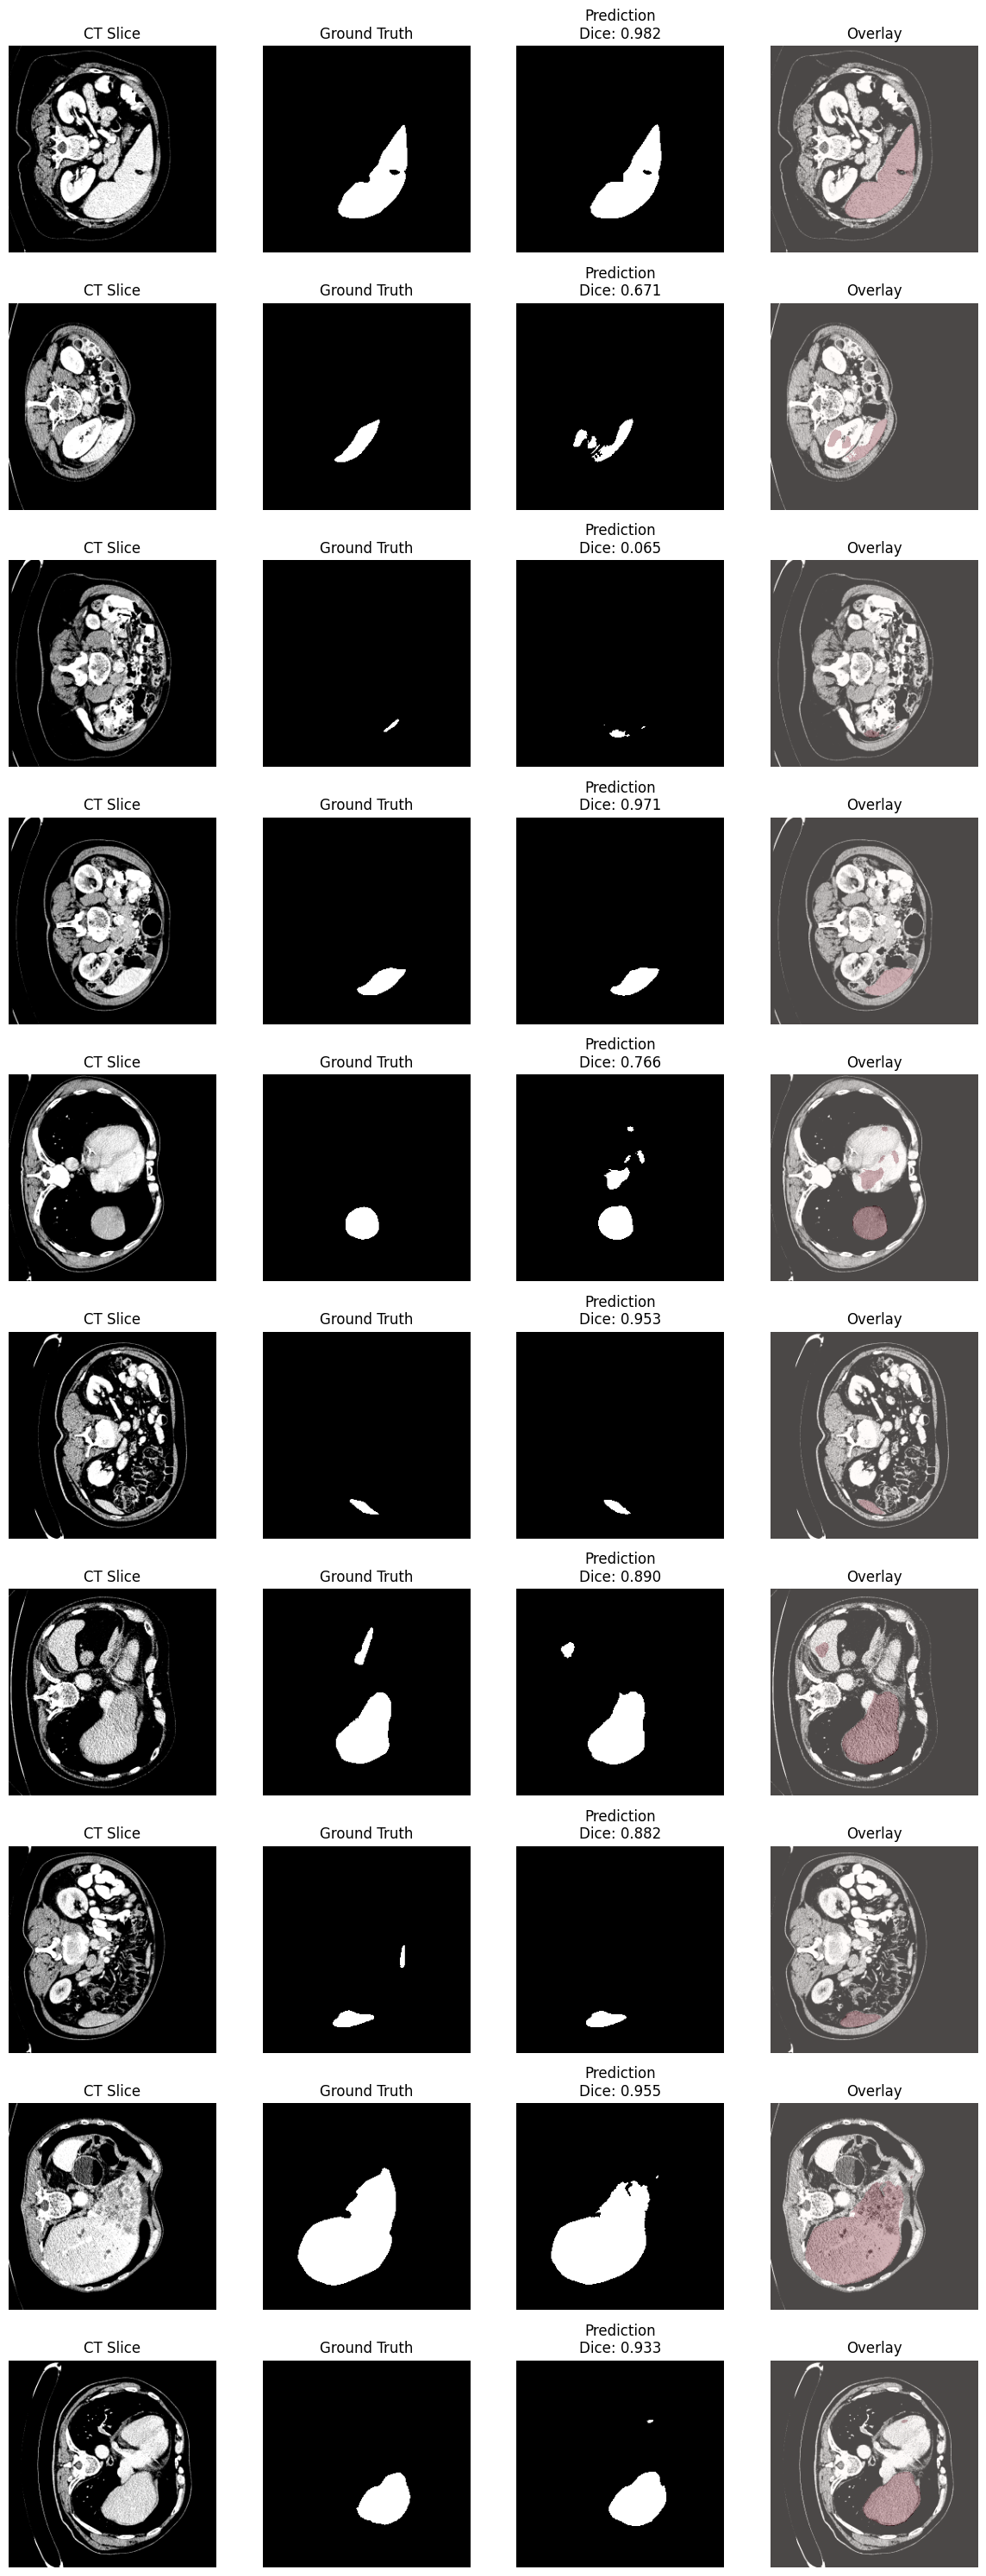

In [43]:

evaluator.visualize(X_global_test, Y_global_test, Y_pred_binary, dice_scores, num_examples=10, seed=42)


In [ ]:

global_scores = [evaluator.compute_global_metrics(Y_global_test[i], Y_pred_binary[i])
               for i in range(len(Y_global_test))]

# Initialize dictionary for accumulating sums
metric_sums = {key: 0.0 for key in global_scores[0]}

# Sum all values
for score in global_scores:
    for key in score:
        metric_sums[key] += score[key]

# Average
num_items = len(global_scores)
avg_scores = {key: metric_sums[key] / num_items for key in metric_sums}

# Print result
print("Average metrics over all slices:")
for metric, value in avg_scores.items():
    print(f"{metric}: {value:.4f}")

#Average metrics over all slices: accuracy: 0.9766 precision: 0.7750 recall: 0.7566 f2_score: 0.7475

In [ ]:
import numpy as np

def limit_test_patients(X_test_all, Y_test_all, patient_ids, max_patients=1):
    """
    Limit test data to the first `max_patients` and return concatenated slices with patient IDs.

    Args:
        X_test_all (list of np.ndarray): Test CT volumes per patient
        Y_test_all (list of np.ndarray): Test segmentation masks per patient
        patient_ids (list of str): Patient IDs corresponding to each volume
        max_patients (int): Max number of patients to include in test set

    Returns:
        X_test (np.ndarray): Flattened test images from selected patients
        Y_test (np.ndarray): Flattened test masks from selected patients
        slice_patient_ids (list of str): Slice-level patient ID list
    """
    selected_X = X_test_all[:max_patients]
    selected_Y = Y_test_all[:max_patients]
    selected_ids = patient_ids[:max_patients]

    X_test = np.concatenate(selected_X, axis=0)
    Y_test = np.concatenate(selected_Y, axis=0)

    slice_patient_ids = [
        pid for pid, vol in zip(selected_ids, selected_X) for _ in range(vol.shape[0])
    ]

    return X_test, Y_test, slice_patient_ids


In [ ]:
len(X_global_test), len(Y_global_test), len(patient_ids)

In [ ]:
print("total patients for testing:", len(test_idx))

X_test_all = [X_all[i] for i in test_idx]
Y_test_all = [Y_all[i] for i in test_idx]
patient_ids_test = [patient_ids[i] for i in test_idx]

X_test_limited, Y_test_limited, slice_patient_ids = limit_test_patients(X_test_all, Y_test_all, patient_ids_test, max_patients=25)

print(X_test_limited.shape, Y_test_limited.shape, len(slice_patient_ids))

In [ ]:
from UNet_Model.segmentation_evaluator import SegmentationEvaluator

evaluator = SegmentationEvaluator(pipeline)

# Run full eval
mean_dice, mean_iou, dice_patients, iou_patients = evaluator.evaluate(
    X_test_limited, Y_test_limited, patient_ids=slice_patient_ids
)


In [ ]:
Y_pred = pipeline.predict(X_test_limited)
Y_pred_binary = (Y_pred > 0.5).astype(np.float32)

dice_scores = [evaluator.compute_dice(Y_test_limited[i], Y_pred_binary[i])
               for i in range(len(Y_test_limited))]

evaluator.visualize(X_test_limited, Y_test_limited, Y_pred_binary, dice_scores, num_examples=3)

## LAB

In [ ]:
binary = False

slices_per_image_to_display = 4

num_of_images = 1

for i in range(num_of_images):
    image_name = f"liver_{i}.nii.gz"
    ct_vol = f"{liver_images_path}/{image_name}"
    label_vol = f"{liver_labels_path}/{image_name}"

    X, Y, info = imgProcessor.prepare_segmentation_dataset(ct_vol, label_vol, binary=binary)

    print(f"Image:{image_name}, slices: {len(X)}")

    ctVisualizer.display_XY_samples(X, Y, max_slices=slices_per_image_to_display, binary=binary)